In [66]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

%matplotlib inline

sns.set(rc={'figure.figsize':(15,10)})

In [67]:
df_sellers = pd.read_csv('sellers.csv')
df_buyers = pd.read_csv('buyers.csv')

In [68]:
df_sellers.head()

,min_value,expected_value,success,day
0,7.0,7.0,False,1
1,9.0,9.0,False,1
2,5.0,5.0,False,1
3,10.0,10.0,False,1
4,7.0,7.7,True,1


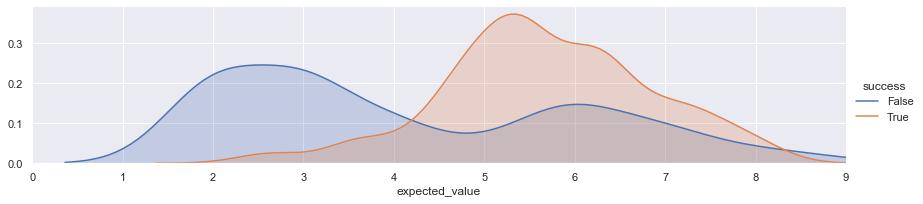

In [69]:
fig = sns.FacetGrid(df_buyers, hue="success", aspect=4)
fig.map(sns.kdeplot, 'expected_value', shade=True)
max_val = df_buyers['expected_value'].max()
fig.set(xlim = (0,max_val))
fig.add_legend()

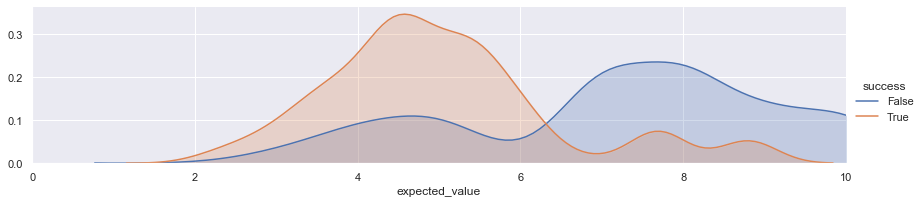

In [70]:
fig = sns.FacetGrid(df_sellers, hue="success", aspect=4)
fig.map(sns.kdeplot, 'expected_value', shade=True)
max_val = df_sellers['expected_value'].max()
fig.set(xlim = (0,max_val))
fig.add_legend()

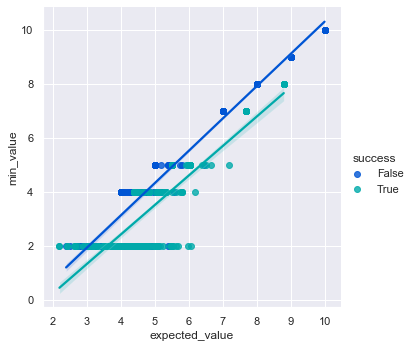

In [71]:
sns.lmplot('expected_value', 'min_value', hue='success', data=df_sellers, palette='winter')

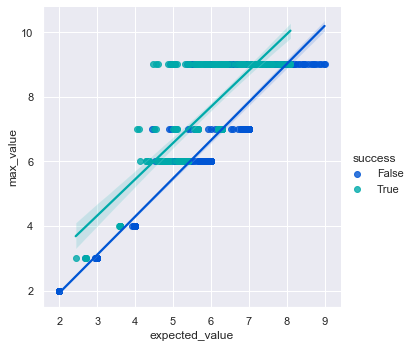

In [72]:
sns.lmplot('expected_value', 'max_value', hue='success', data=df_buyers, palette='winter')

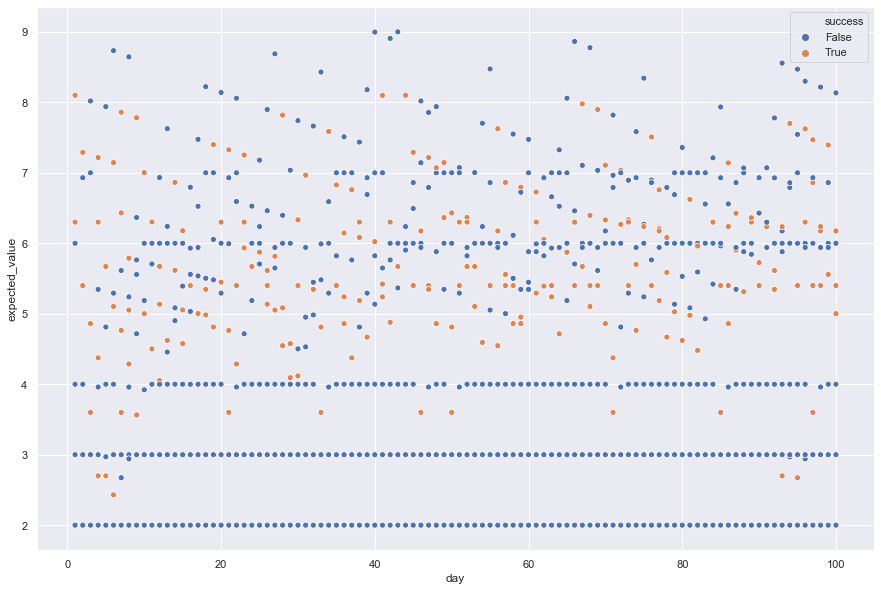

In [73]:
ax = sns.scatterplot(x="day", y="expected_value", hue="success",data=df_buyers)

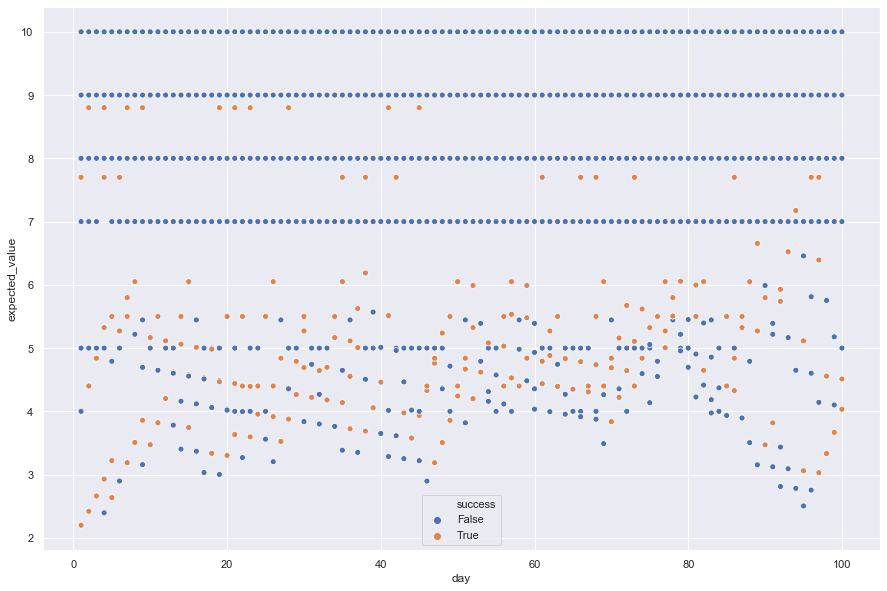

In [74]:
ax = sns.scatterplot(x="day", y="expected_value", hue="success",data=df_sellers)

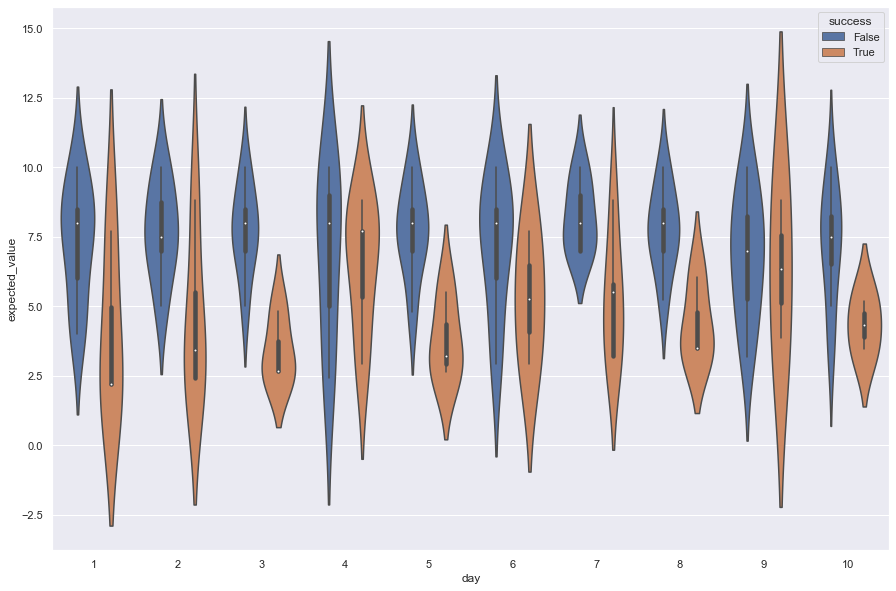

In [75]:
ax = sns.violinplot(x="day", y="expected_value", data=df_sellers.head(100), hue='success')

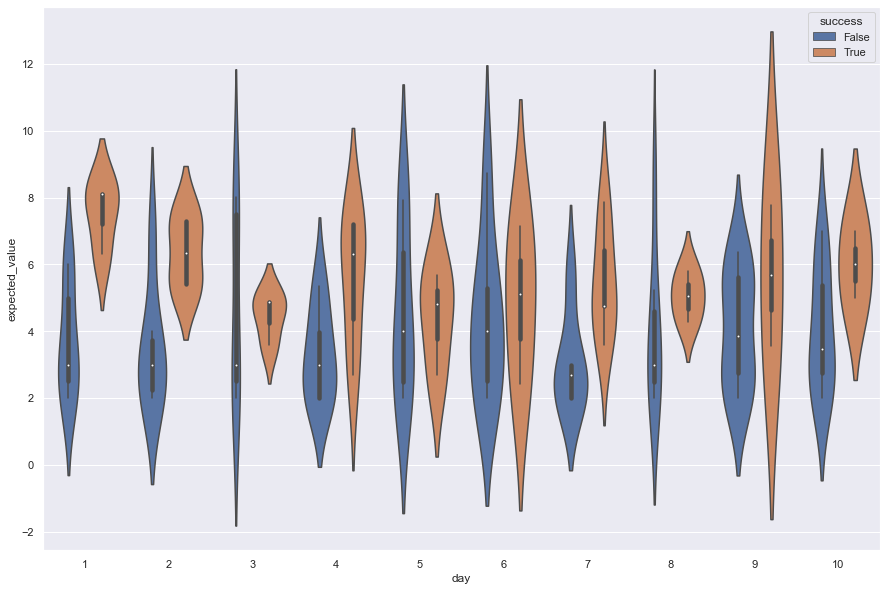

In [76]:
ax = sns.violinplot(x="day", y="expected_value", data=df_buyers.head(100), hue='success')

In [77]:
dummies_buyers = pd.get_dummies(df_buyers, columns=['success'])

In [78]:
dummies_sellers = pd.get_dummies(df_sellers, columns=['success'])

In [94]:
df_buyers_mean = dummies_buyers.groupby(['day'],as_index = False).mean()
df_sellers_mean = dummies_sellers.groupby(['day'],as_index = False).mean()

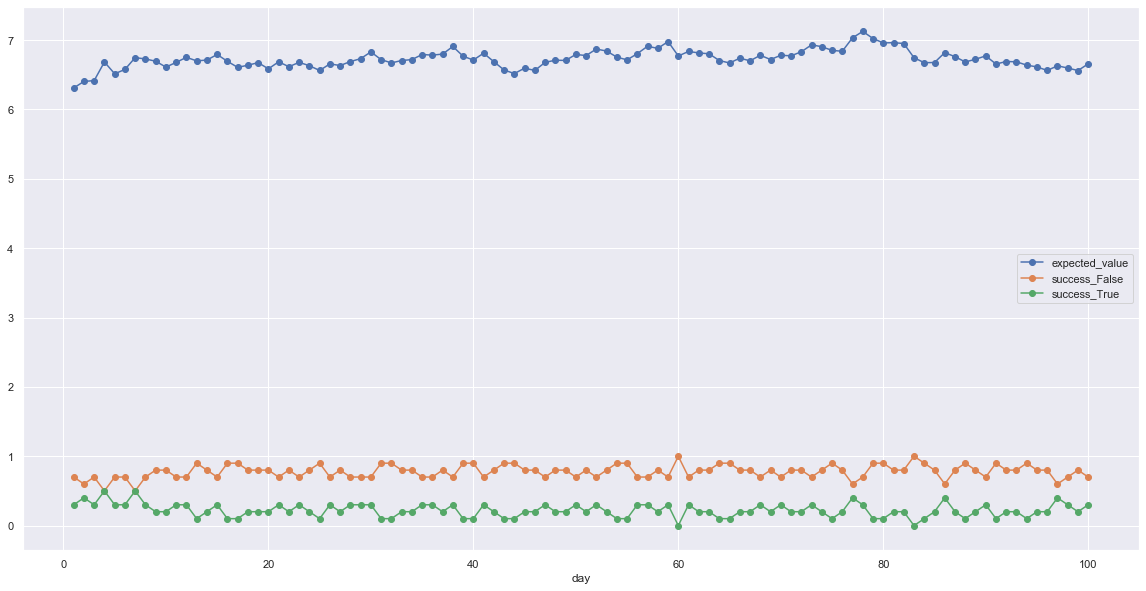

In [95]:
df_sellers_mean.plot(x='day', y=['expected_value', "success_False","success_True"], linestyle='-', marker='o', figsize=(20,10))

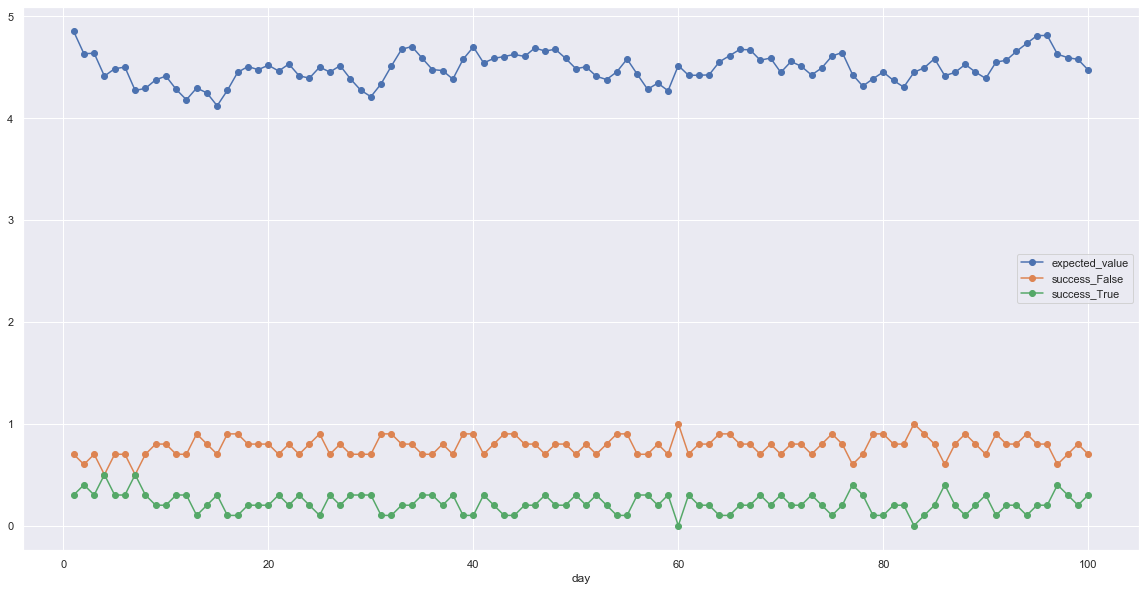

In [96]:
df_buyers_mean.plot(x='day', y=['expected_value', "success_False","success_True"], linestyle='-', marker='o', figsize=(20,10))

In [98]:
df_buyers_mean['adapted_expected_value'] = df_buyers_mean['expected_value']/10

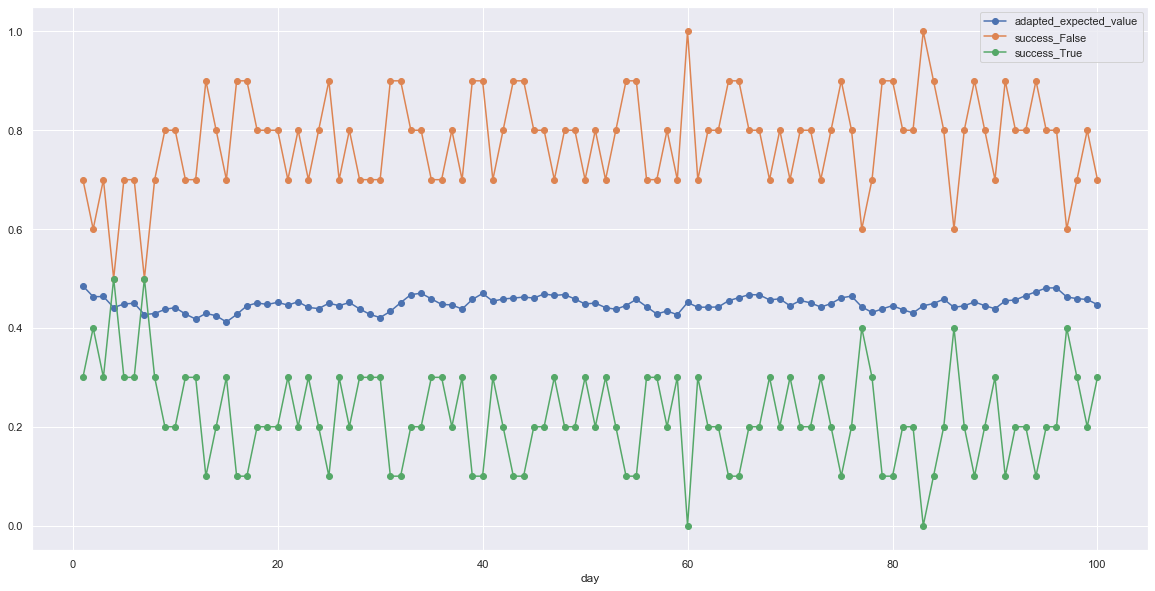

In [99]:
df_buyers_mean.plot(x='day', y=['adapted_expected_value', "success_False","success_True"], linestyle='-', marker='o', figsize=(20,10))